### This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

##### What is the distribution of conservation status for species?
##### Are certain types of species more likely to be endangered?
##### Are the differences between species and their conservation status significant?


Data sources:
Both Observations.csv and Species_info.csv were provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

In [66]:
#Import any necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr, chi2_contingency

observations = pd.read_csv("observations.csv", encoding="utf-8")
species = pd.read_csv("species_info.csv", encoding="utf-8")

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [5]:
#Getting a sense of what the data we're working with looks like
observations.info()
observations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [6]:
species.info()
species.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


Next a quick check on both tables can be done to see if there are any missing values or if there is any messy data that needs cleaning

In [7]:
#Checking if the data is clean and without duplicates for easier manipulatability
print(observations.duplicated().value_counts())
observations = observations.drop_duplicates()

print('\n')
print(observations.isna().sum())

False    23281
True        15
dtype: int64


scientific_name    0
park_name          0
observations       0
dtype: int64


In [8]:
print(species.duplicated().value_counts())
print(species.conservation_status.isna().value_counts())

#Fill null rows with a value
species = species.fillna(value={"conservation_status":"Healthy Population"})
print(species.conservation_status.unique())

False    5824
dtype: int64
True     5633
False     191
Name: conservation_status, dtype: int64
['Healthy Population' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


### What is the distribution of conservation_status for animals?

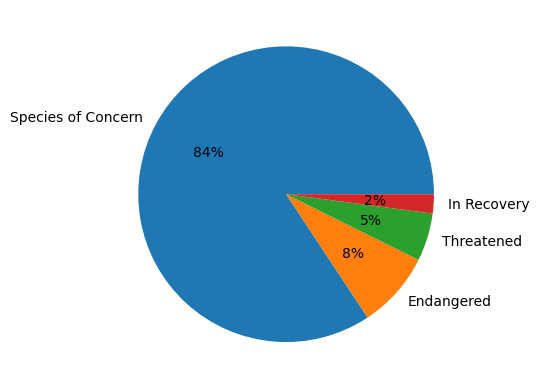

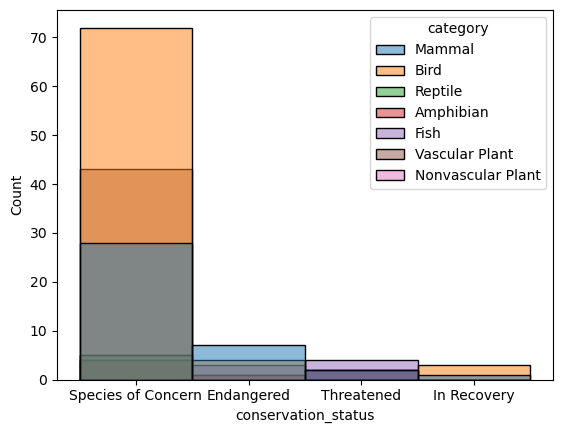

Total Number of at risk animals per group
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64




<Figure size 640x480 with 0 Axes>

In [36]:
#remove the healthy population for the sake of the analysis

conservation_group= species.conservation_status[species.conservation_status != "Healthy Population"]
#plot charts

plt.pie(conservation_group.value_counts(), labels = conservation_group.unique(), autopct = '%1d%%')
plt.show()
plt.clf()

sns.histplot(data=species[species.conservation_status!= "Healthy Population"], x="conservation_status", hue="category")
plt.show()
plt.clf()

print("Total Number of at risk animals per group")
print(conservation_group.value_counts())
print('\n')

### Are certain types of species more likely to be endangered?

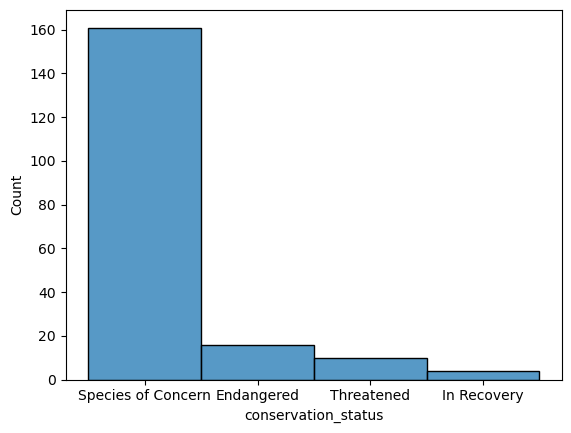

Matrix of at risk populations


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 640x480 with 0 Axes>

In [63]:
sns.histplot(data=species[species.conservation_status!= "Healthy Population"], x="conservation_status")
plt.show()
plt.clf()

print("Matrix of at risk populations")
matrix= species[species.conservation_status != "Healthy Population"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
matrix

###### With the use of the at risk population numbers, we can compare endangered totals against the total group

In [62]:
#Total Number of at risk animals per group
total_count= species.category[species.conservation_status!= "Healthy Population"].value_counts()

#Number of endangered animals by species
endangered_count=species.category[species.conservation_status=="Endangered"].value_counts()

#Percentage of endangered animals per at risk population(%)
endangeredpct= np.round(100*(endangered_count/total_count),3)

at_risk_stats={"Total Number of at risk per group": total_count, "Endangered Animals by Species": endangered_count, "Percentage of at risk Endangered Animals (%)": endangeredpct}
at_risk_df= pd.DataFrame.from_dict(at_risk_stats)

at_risk_df

,Total Number of at risk per group,Endangered Animals by Species,Percentage of at risk Endangered Animals (%)
Amphibian,7,1.0,14.286
Bird,79,4.0,5.063
Fish,11,3.0,27.273
Mammal,38,7.0,18.421
Nonvascular Plant,5,NaN,NaN
Reptile,5,NaN,NaN
Vascular Plant,46,1.0,2.174


Examining these numbers against the larger pool of animals, we can organize the at risk populations into a "protected" category and calculate the percent of at risk, protected animals against the total pool of the unprotected healthy population.

In [54]:
#To be able to analyze the at risk animal populations, a value for anything but a healthy population must be added
species['is_protected'] = species.conservation_status != 'Healthy Population'

category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
category_counts_piv= category_counts.pivot(columns='is_protected',index='category',values='scientific_name').reset_index()

category_counts_piv.columns = ['category', 'not_protected', 'protected']
category_counts_piv['percent_protected'] = np.round(category_counts_piv.protected/(category_counts_piv.protected+category_counts_piv.not_protected) * 100,3)

category_counts_piv

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.861
1,Bird,413,75,15.369
2,Fish,115,11,8.730
3,Mammal,146,30,17.045
4,Nonvascular Plant,328,5,1.502
5,Reptile,73,5,6.410
6,Vascular Plant,4216,46,1.079


### Are the differences between species and their conservation status significant?

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

Next we will run some chi-aquared tests to see if there are any statistically significant differences in the species conservation status rates. To run a chi-squared test, we will need contingency tables:

||protected|not protected|
|-|-|-|
|Species1|?|?|
|Species2|?|?|

In [75]:
mammals_vs_birds = [[30,146],[75,413]]
chi2, pval, dof, expected = chi2_contingency(mammals_vs_birds)

print("The p-value returned from the test is {}. \nThe chi2 value returned from the test is {}.".format(np.round(pval,4),np.round(chi2,4)))


The p-value returned from the test is 0.6876. 
The chi2 value returned from the test is 0.1617.


###### The first test ran mammals against birds.
As we can see, our chi2 value returned was .16, and our p-value returned was .6876.\
\
For a 2x2 table, Chi-squared greater than about 4 indicates an association. Our test has not come close to that number, and additionally the standard p-value to test statistical significance is 0.05. The value of 0.6876 from the test is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them, meaning the variables are independent of one another

In [83]:
fish_vs_vplant = [[11,115],[46,4216]]
chi2, pval, dof, expected = chi2_contingency(fish_vs_reptile)

print("The p-value returned from the test is {}. \nThe chi2 value returned from the test is {}.".format(pval,np.round(chi2,4)))

The p-value returned from the test is 0.7406524615907095. 
The chi2 value returned from the test is 0.1096.


###### The second test ran fish against vascular plants.

Once again we see out chi2 value returned as a .11 and our p-value returned as a .74
\
The Chi2 value is not large enough and the p-value is not small enough to indicate any statistical significance between the two species of animals.

### In Conclusion
Revisiting the topic questions brought on at the beginnins of the project:
##### What is the distribution of conservation status for species?
The vast majority of the species documented were not a part of the conservation group.
##### Are certain types of species more likely to be endangered?
Of all the species, mammals and birds had the highest percentages of protected animals
##### Are the differences between species and their conservation status significant?
Of the two comparisons we ran, fish vs vascular plants and mammals vs birds showed no statistically significant relationships between the species and their respective conservation statuses. However if more chi2 tests were to be run we could perhaps uncover a relationship.